In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt
import re as re


# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [71]:
commune = pd.read_excel("commune.xlsx")
enroll = pd.read_csv ('enroll.csv')
industry = pd.read_csv ('industry.csv')
order = pd.read_csv ('ord.csv')
quest = pd.read_csv ('quest.csv')
study_domain = pd.read_csv ('study_domain.csv')
technology = pd.read_csv ('technology.csv')
transaction = pd.read_csv ('transaction.csv')

In [46]:
commune.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


In [45]:
enroll.head()

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


In [44]:
industry.head()

,Unnamed: 0,key,values,quest_id
0,0,item1,Finance,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item6,Technology (Software/ Internet),905e2608-ce95-11eb-809f-7c67a234f601
2,2,item5,Education,905e2608-ce95-11eb-809f-7c67a234f601
3,3,item3,Consulting,905e2608-ce95-11eb-809f-7c67a234f601
4,4,item7,Energy,905e2608-ce95-11eb-809f-7c67a234f601


In [43]:
order.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636,0,0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601


In [42]:
quest.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [41]:
study_domain.head()

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item1,Computer Science,905e4cf5-ce95-11eb-96a9-7c67a234f601
2,2,item6,Management,905e4cf5-ce95-11eb-96a9-7c67a234f601
3,3,other,other,905e73fd-ce95-11eb-a7b0-7c67a234f601
4,4,other,other,905e9b27-ce95-11eb-9c37-7c67a234f601


In [40]:
technology.head()

,Unnamed: 0,key,values,quest_id
0,0,item1,R,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item11,Excel,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,item2,Python,905e2608-ce95-11eb-809f-7c67a234f601
3,3,item3,Java,905e2608-ce95-11eb-809f-7c67a234f601
4,4,item4,JavaScript,905e2608-ce95-11eb-809f-7c67a234f601


In [56]:
transaction.head()

,Unnamed: 0,created_at,modified_at,user_id,course_id,transaction_id,Payment Method
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952,Moncash
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160,Moncash
2,2,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,1047613,4645070622,Moncash
3,3,2021-03-08T19:06:32.837Z,2021-03-08T19:06:32.837Z,41177453,1047613,4645208830,Moncash
4,4,2021-03-08T22:10:00.796Z,2021-03-08T22:10:00.796Z,40797121,1047613,4646815401,Moncash


In [59]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain2=study_domain1.groupby("quest_id").sum()

In [60]:
technologyy = pd.get_dummies(data=technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()

In [61]:
industry1=pd.get_dummies(data=industry[["quest_id","key","values"]], columns= ["values"], prefix="", prefix_sep="")
industry2= industry1.groupby("quest_id").sum()

In [18]:
#make a groupeby
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

merge5=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
merge5

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,Ferrier,HT0412,North-East,HT04


In [20]:
reslt=pd.merge(left=merge5, right=enroll, how = 'left',on='quest_id')
reslt.shape

(250, 36)

### How many applications must be made to select 25% women for each on average?

In [64]:
a=3 #Cohorts number
b=30 #Number selected by cohort
c=a*b #Total selected applicants
print("Total quantity of future applicants selected :" , c )

d=0.25 #future selected women average
e=c*d # future number selected women
print("Total number of future women selected :" , int(e+1))

f=4 #Actual total women selected
g=20 #Total actual applicants selected
h=4/20 #Actual selected women ratio
print("Actual selected women ratio :" , h*100 , "%")

i=250 #current amount of applicants
j=0.25 #Future selected women ratio


#If we have the same women application ratio

l=47 # Actuel number of women applicants
m=4 #Actual selected women
e=c*d #future number selected women
n=(l*e)/m #Future women application number needed
print ("Future women application number needed: ", int(n+1))

i=250 #current amount of applicants
l=47 # Actuel number of women applicants
n=265 #Future women application number needed
o=(i*n)/l # Number of future applications needed if we want to select 25% women for each on average , with 3 cohorts of 30 selected students
print("Number of future applications needed if we want to select 25% women for each cohorts on average , with 3 cohorts of 30 selected students :" , int(o+1))

Total quantity of future applicants selected : 90
Total number of future women selected : 23
Actual selected women ratio : 20.0 %
Future women application number needed:  265
Number of future applications needed if we want to select 25% women for each cohorts on average , with 3 cohorts of 30 selected students : 1410


### What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

In [21]:
reslt['hear_AA_1'].value_counts()

Friend                     67
WhatsApp                   66
Facebook                   40
ESIH                       18
Ayiti Analytics Website    15
LinkedIn                   15
Bootcamp Alumni            14
other                       9
Instagram                   5
unknown                     1
Name: hear_AA_1, dtype: int64

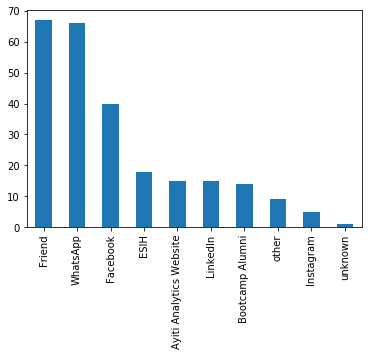

In [22]:
reslt['hear_AA_1'].value_counts().plot.bar()

In [23]:
reslt['percentage_completed'].mean()

0.33191105897058837

In [24]:
data = reslt.loc[reslt['percentage_completed'] >= 0.33191105897058837, : ]

In [25]:
data.shape

(42, 36)

In [26]:
data['hear_AA_1'].value_counts()

Friend                     14
WhatsApp                    9
Bootcamp Alumni             6
Facebook                    5
Ayiti Analytics Website     3
LinkedIn                    3
other                       1
ESIH                        1
Name: hear_AA_1, dtype: int64

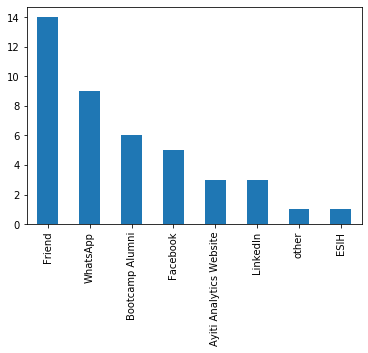

In [27]:
data['hear_AA_1'].value_counts().plot.bar()

### Response: Those who are likely to be selected are those who are above the average percentage of completed courses and this group the most effective communication channels are: Friend, whatsapp and Bootcamp Alumni

###  What is the average number of university students who should participate in this program?

In [33]:
university_students = reslt.loc[(reslt['education_level'] =='Bachelors (bacc +4)' ) |  (reslt['education_level']=='Masters') | (reslt['education_level'] =='Doctorate (PhD, MD, JD)') ]
university_students.shape

(163, 36)

In [34]:
mean_university_students = university_students.shape[0]/ reslt.shape[0]
mean_university_students

0.652

In [35]:
number_of_particicipant = 30
average_university_students = mean_university_students * number_of_particicipant
average_university_students

19.560000000000002

### Response:  the average number of university students who should participate in this program is  19.560000000000002= 20

### What will be the average number of applications per week that we could have?

### How many weeks should we extend the application process to select 60 students per commune?

In [82]:
p=250 #ACtual quantity of applicants
w=5 #Actual number week
q=p/w #Actual average applicants by week
print("Actual average applicants by week :", q)


#Total future selected
r=60 #selected students by commune
s=3 #number commune
t=r*s #Total future selected
print("Total future selected :", t, "applicants")

#Total future applicants
u=20 #Actual applicant number
v=(p*t)/u #Total future applicants
print("Total future applicants :", v, "applicants")

#If we have the average application by week, found the extend delay
x=v/q #Total future week
#we considere we maintain the actuel 5 weeks inscriptions.
y=x-w #Extend delay

print("If we want to have 60 select students per commune , and if we have the same average applicaion by week ,the extend delay found will be : ", y, "weeks")

Actual average applicants by week : 50.0
Total future selected : 180 applicants
Total future applicants : 2250.0 applicants
If we want to have 60 select students per commune , and if we have the same average applicaion by week ,the extend delay found will be :  40.0 weeks


### If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time

In [77]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='gray',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [78]:
def prob_category(data,top_n=5,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,5)):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result

In [79]:
transaction['Payment Method'] = 'Moncash'
order['Payment Method'] = 'Credit Card/Paypal'
x = transaction.loc[:,['Payment Method','user_id']]
y = order.loc[:,['Payment Method','user_id']]
trans_ord= pd.concat([x,y],axis=0)

enroll1=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )


enroll11= enroll1.loc[:,['Payment Method','user_id','quest_id']]
moy_enroll=enroll1['percentage_completed'].value_counts(ascending=True).mean()
moy_enroll
moy_enroll= moy_enroll/10
en=enroll1[enroll1['percentage_completed'] > moy_enroll]
en['percentage_completed'].to_frame

<bound method Series.to_frame of 13     0.930233
16     0.697674
20     0.534884
21     0.418605
22     0.953488
24     0.452381
27     0.906977
37     0.833333
44     0.813953
45     0.619048
48     0.511628
50     0.860465
52     0.953488
57     0.452381
58     0.523810
68     0.953488
73     0.534884
75     0.906977
76     0.883721
77     0.953488
82     0.744186
85     0.953488
88     0.674419
89     0.790698
90     0.906977
91     0.395349
92     0.906977
93     0.465116
94     0.488372
99     0.813953
103    0.604651
104    0.418605
107    0.395349
108    0.604651
111    0.883721
123    0.418605
124    0.883721
129    0.697674
131    0.465116
132    0.418605
133    0.767442
139    0.604651
Name: percentage_completed, dtype: float64>

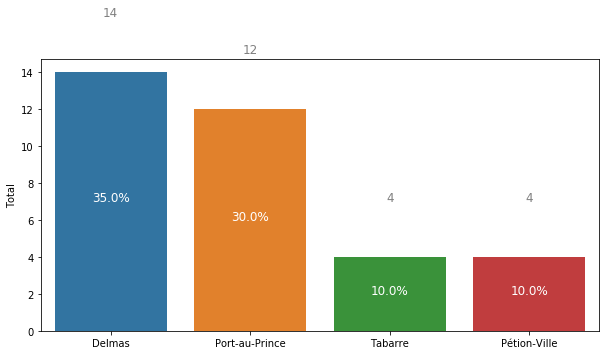

,Total,Percent
Delmas,14,0.35
Port-au-Prince,12,0.30
Tabarre,4,0.10
Pétion-Ville,4,0.10


In [81]:
merge200=pd.merge(left=en, right=reslt, how = 'left',on='quest_id')
prob_category(data=merge200,top_n =4 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

### If we were to do all the bootcamp online,  the best communes would be : Delmas, Port-au-Prince and Tabarre or Petion-ville

### What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection?

In [36]:
data1 = data.loc[data['gender'] == 'female', : ]

In [37]:
data1['hear_AA_1'].value_counts()

WhatsApp           3
Bootcamp Alumni    3
Friend             2
Facebook           2
other              1
LinkedIn           1
Name: hear_AA_1, dtype: int64

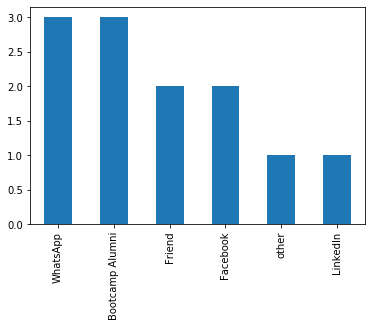

In [38]:
data1['hear_AA_1'].value_counts().plot.bar()

### Response : The most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection are : Whatsapp, Bootcamp Alumni, Friend   